In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

# log_file = 'log/round3_empty.log'
log_file = 'log/round3_pair_trading_test.log'

with open(log_file, 'r') as f:
    lines = f.readlines()
    
    activity_start = 0
    while not lines[activity_start].startswith('Activities log:'):
        activity_start += 1
    activity_start += 1
    activity_end = activity_start + 1
    while lines[activity_end] != '\n':
        activity_end += 1

    trade_start = activity_end + 1
    while not lines[trade_start].startswith('Trade History:'):
        trade_start += 1
    trade_start += 1
    trade_end = len(lines)

    trade_history = ''.join(lines[trade_start:trade_end])

activity_log = pd.read_csv(log_file, skiprows=activity_start, nrows=activity_end-activity_start-1, sep=';')
trade_history = pd.read_json(trade_history)
market_trades = trade_history[(trade_history.buyer == '') & (trade_history.seller == '')]

C:\Users\Meilism\AppData\Local\Temp\ipykernel_34224\909094253.py:28: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  trade_history = pd.read_json(trade_history)


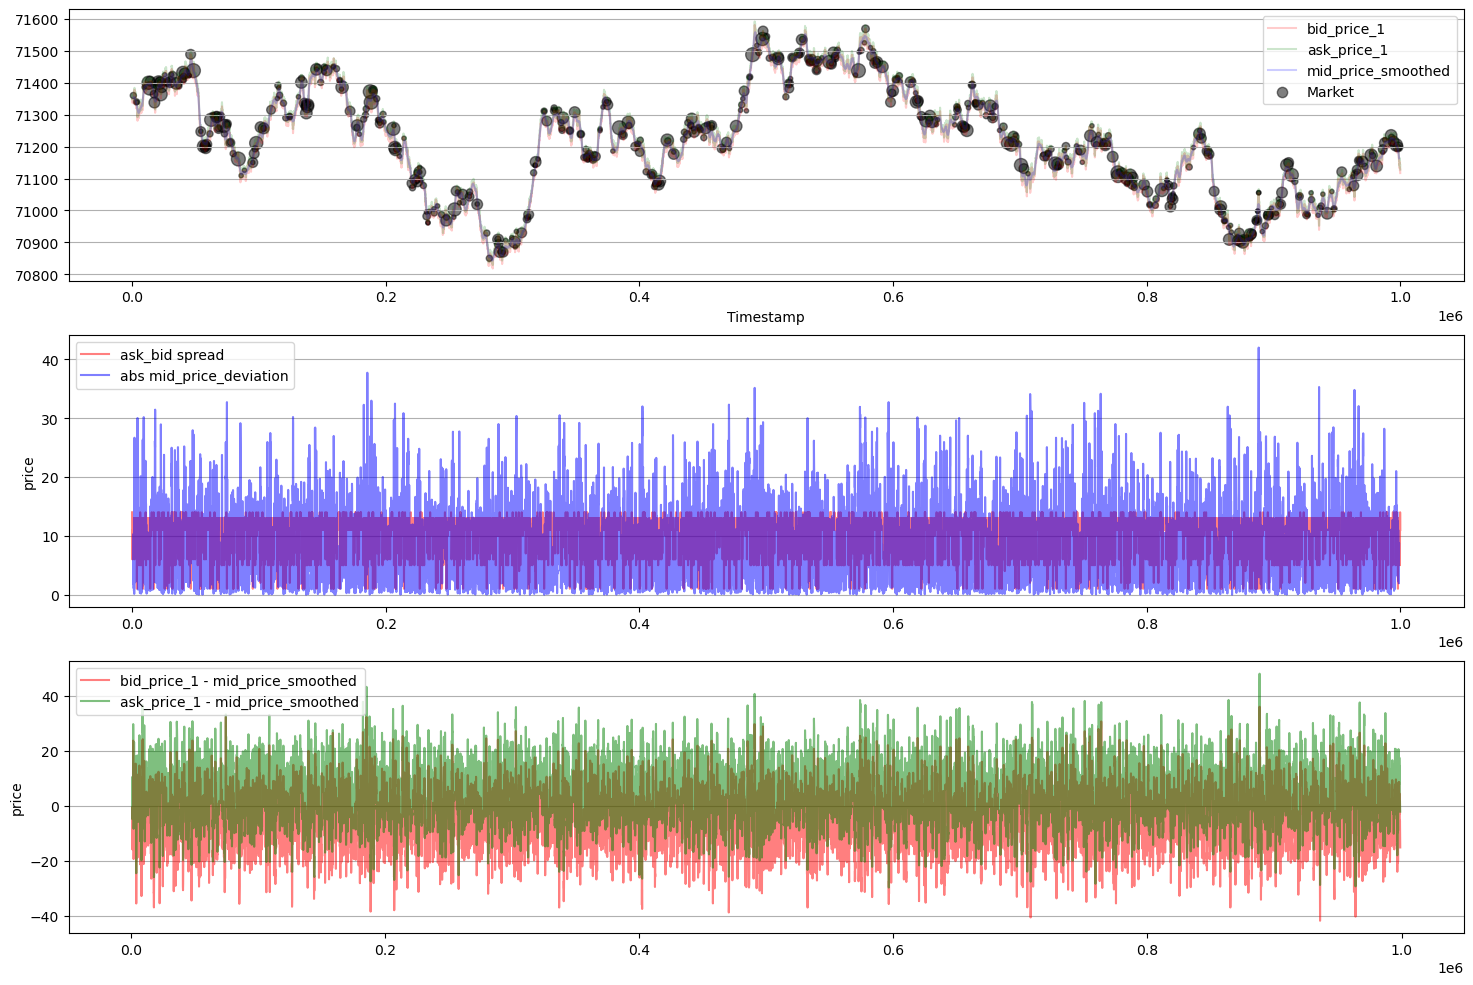

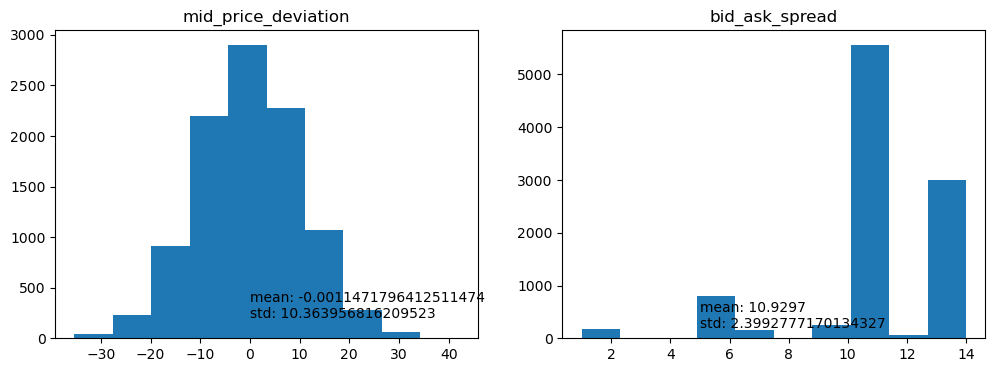

In [2]:
symbol = 'GIFT_BASKET'

window_size = 20

activity = activity_log[activity_log['product'] == symbol].set_index('timestamp')
market = market_trades[market_trades.symbol == symbol].set_index('timestamp')

assert isinstance(activity, pd.DataFrame)
activity['mid_price_smoothed'] = activity['mid_price'].rolling(window=window_size, center=True).mean()
activity['mid_price_deviation'] = activity['mid_price'] - activity['mid_price_smoothed']
activity['bid_ask_spread'] = activity['ask_price_1'] - activity['bid_price_1']

fig, ax = plt.subplots(3, 1, figsize=(18, 12))

plt.subplot(3, 1, 1)
plt.plot(activity['bid_price_1'], label='bid_price_1', color='red', alpha=0.2,)
plt.plot(activity['ask_price_1'], label='ask_price_1', color='green', alpha=0.2)
plt.plot(activity['mid_price_smoothed'], label='mid_price_smoothed', color='blue', alpha=0.2)
plt.scatter(market.index, market.price, label='Market', s=10*market.quantity, color='black', alpha=0.5)
plt.xlabel('Timestamp')
plt.grid(axis='y')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(activity['ask_price_1'] - activity['bid_price_1'], label='ask_bid spread', color='red', alpha=0.5)
plt.plot(abs(activity['mid_price_deviation']), label='abs mid_price_deviation', color='blue', alpha=0.5)
plt.ylabel('price')
plt.grid(axis='y')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(activity['bid_price_1'] - activity['mid_price_smoothed'], label='bid_price_1 - mid_price_smoothed', color='red', alpha=0.5)
plt.plot(activity['ask_price_1'] - activity['mid_price_smoothed'], label='ask_price_1 - mid_price_smoothed', color='green', alpha=0.5)
plt.ylabel('price')
plt.grid(axis='y')
plt.legend()

plt.show()

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(activity['mid_price_deviation'], label='mid_price_deviation')
plt.text(0, 200, f"mean: {activity['mid_price_deviation'].mean()}\nstd: {activity['mid_price_deviation'].std()}")
plt.title('mid_price_deviation')

plt.subplot(1, 2, 2)
plt.hist(activity['bid_ask_spread'], label='bid_ask_spread')
plt.text(5, 200, f"mean: {activity['bid_ask_spread'].mean()}\nstd: {activity['bid_ask_spread'].std()}")
plt.title('bid_ask_spread')

plt.show()

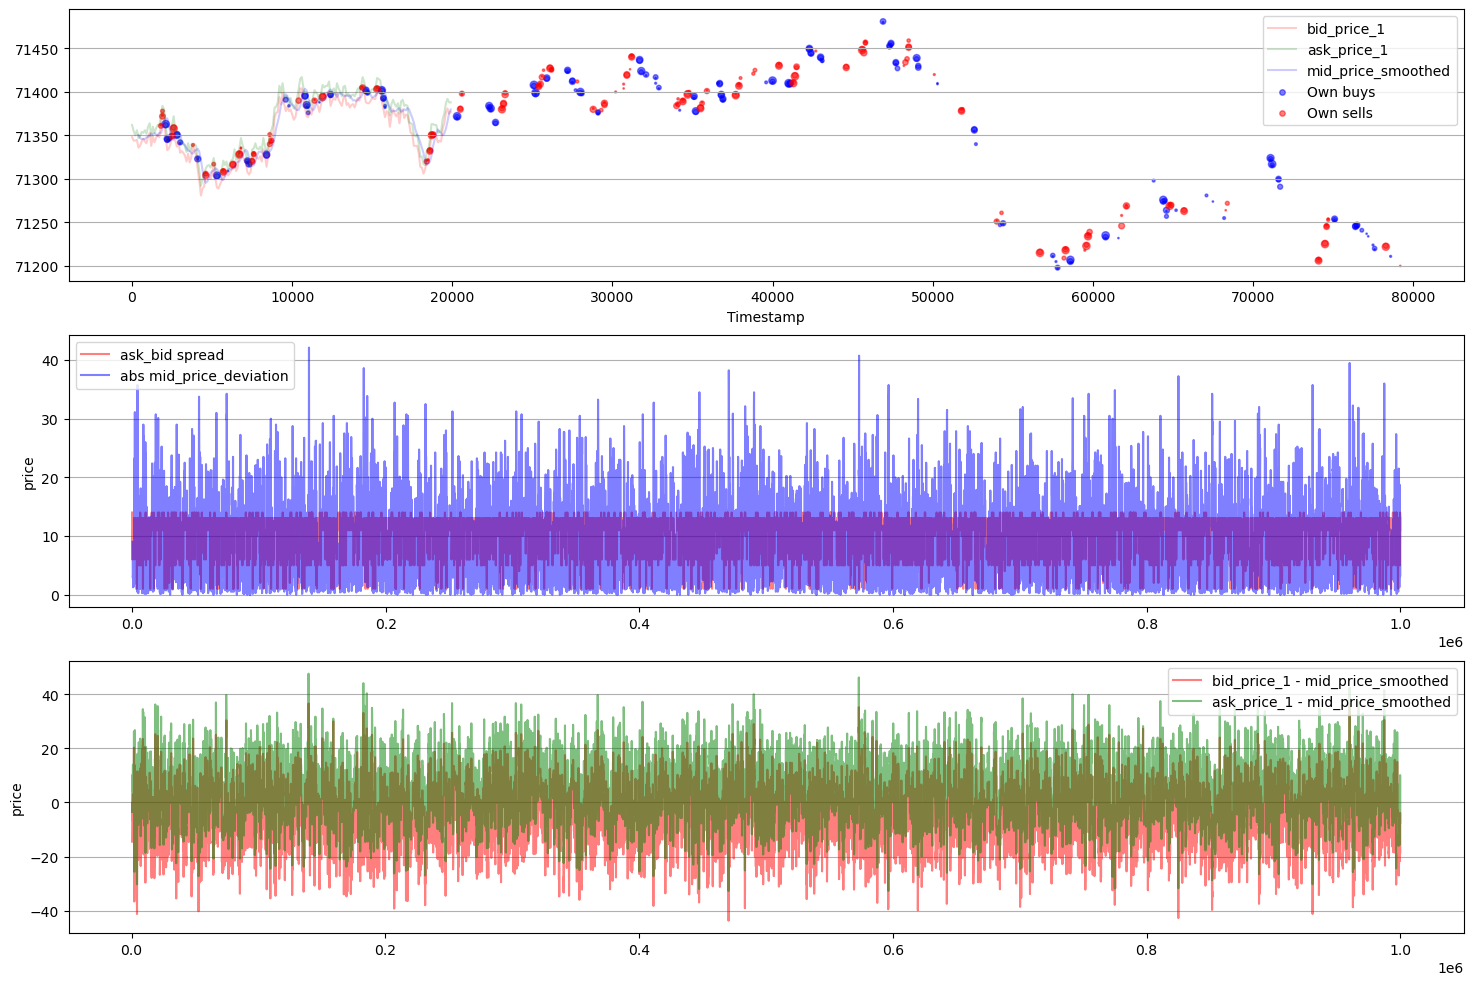

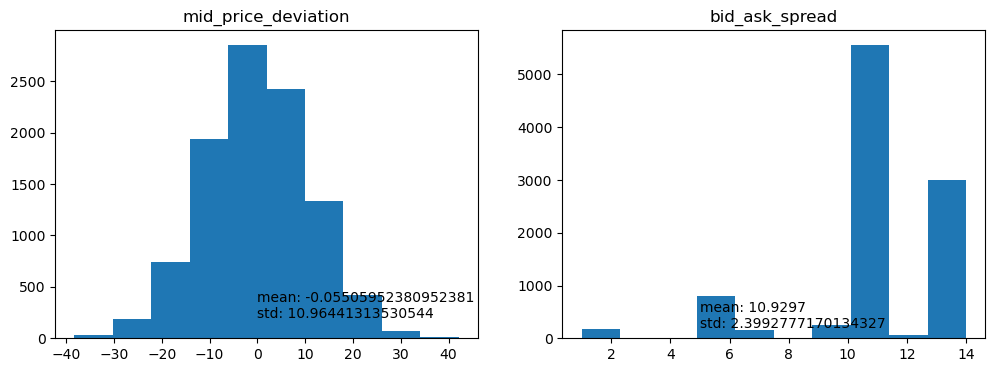

In [10]:
symbol = 'GIFT_BASKET'

window_size = 4
sample = 200

activity = activity_log[activity_log['product'] == symbol].set_index('timestamp')
market = market_trades[market_trades.symbol == symbol].set_index('timestamp')
own_buys = trade_history[(trade_history.symbol == symbol) & (trade_history.buyer == 'SUBMISSION')].set_index('timestamp')
own_sells = trade_history[(trade_history.symbol == symbol) & (trade_history.seller == 'SUBMISSION')].set_index('timestamp')

assert isinstance(activity, pd.DataFrame)
activity['mid_price_smoothed'] = activity['mid_price'].rolling(window=window_size).mean().shift(1)
activity['mid_price_deviation'] = activity['mid_price'] - activity['mid_price_smoothed']
activity['bid_ask_spread'] = activity['ask_price_1'] - activity['bid_price_1']

fig, ax = plt.subplots(3, 1, figsize=(18, 12))

plt.subplot(3, 1, 1)
plt.plot(activity['bid_price_1'][:sample], label='bid_price_1', color='red', alpha=0.2,)
plt.plot(activity['ask_price_1'][:sample], label='ask_price_1', color='green', alpha=0.2)
plt.plot(activity['mid_price_smoothed'][:sample], label='mid_price_smoothed', color='blue', alpha=0.2)
# plt.scatter(market.index[:sample], market.price[:sample], label='Market trades', s=10*market.quantity[:sample], color='black', alpha=0.5)
plt.scatter(own_buys.index[:sample], own_buys.price[:sample], label='Own buys', s=1*own_buys.quantity[:sample], color='blue', alpha=0.5)
plt.scatter(own_sells.index[:sample], own_sells.price[:sample], label='Own sells', s=1*own_sells.quantity[:sample], color='red', alpha=0.5)
plt.xlabel('Timestamp')
plt.grid(axis='y')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(activity['ask_price_1'] - activity['bid_price_1'], label='ask_bid spread', color='red', alpha=0.5)
plt.plot(abs(activity['mid_price_deviation']), label='abs mid_price_deviation', color='blue', alpha=0.5)
plt.ylabel('price')
plt.grid(axis='y')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(activity['bid_price_1'] - activity['mid_price_smoothed'], label='bid_price_1 - mid_price_smoothed', color='red', alpha=0.5)
plt.plot(activity['ask_price_1'] - activity['mid_price_smoothed'], label='ask_price_1 - mid_price_smoothed', color='green', alpha=0.5)
plt.ylabel('price')
plt.grid(axis='y')
plt.legend()

plt.show()

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(activity['mid_price_deviation'], label='mid_price_deviation')
plt.text(0, 200, f"mean: {activity['mid_price_deviation'].mean()}\nstd: {activity['mid_price_deviation'].std()}")
plt.title('mid_price_deviation')

plt.subplot(1, 2, 2)
plt.hist(activity['bid_ask_spread'], label='bid_ask_spread')
plt.text(5, 200, f"mean: {activity['bid_ask_spread'].mean()}\nstd: {activity['bid_ask_spread'].std()}")
plt.title('bid_ask_spread')

plt.show()